<a href="https://colab.research.google.com/github/nidhivanjare/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary modules that i will used
#Libraries for Basic Data Processing
import numpy as np
import pandas as pd

!pip install tabulate

import requests
import itertools
        
#Libraries for Exception Handling
import warnings
warnings.filterwarnings('ignore')

#Libraries for data pre-processing, visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the csv data file
df =  pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Data Analysis


In [4]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# check the missing values on the dataset 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# check the central tendency of numerical data in dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [7]:
# check the number of rows and columns of the dataset we are using
print(f'The dataset consist of {df.shape[0]} rows and {df.shape[1]} columns')

The dataset consist of 5110 rows and 12 columns


In [8]:
print(f"\nDescription of Data (categorical data typed features) :")
df.describe(include=object)


Description of Data (categorical data typed features) :


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
# check value counts of categorical variables
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in categorical : 
    print(f'Variabel : {i}')
    print(f'Number of Value Counts : {df[i].value_counts()}')
    print('-' * 50)

Variabel : gender
Number of Value Counts : Female    2994
Male      2116
Name: gender, dtype: int64
--------------------------------------------------
Variabel : ever_married
Number of Value Counts : Yes    3353
No     1757
Name: ever_married, dtype: int64
--------------------------------------------------
Variabel : work_type
Number of Value Counts : Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
--------------------------------------------------
Variabel : Residence_type
Number of Value Counts : Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
--------------------------------------------------
Variabel : smoking_status
Number of Value Counts : never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
--------------------------------------------------


#Data Preprocessing


In [10]:
# copy the original data
df2 = df.copy()

bmi_median = np.nanmedian(df2['bmi'])
# Replace the missing values with median 
df2['bmi'] = df2['bmi'].replace({np.nan : bmi_median})
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# EDA

In [11]:
# Percentage of patients with Brain Strok
d1=df2.groupby('stroke').count()['age']
d1

stroke
0    4861
1     249
Name: age, dtype: int64

In [12]:
label1=df2.groupby('stroke').count()['age'].index
label1

Int64Index([0, 1], dtype='int64', name='stroke')

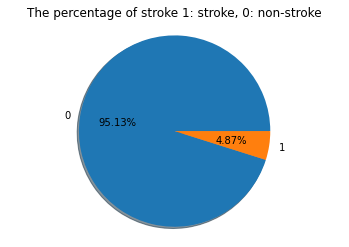

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.axis("equal")
plt.pie(d1,labels=label1, shadow=True, autopct='%1.2f%%',radius=1.1)
plt.title("The percentage of stroke 1: stroke, 0: non-stroke")
plt.show()

In [14]:
# Stroke Patient's Age Distribution
data1=df2[df2["stroke"]==1]
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


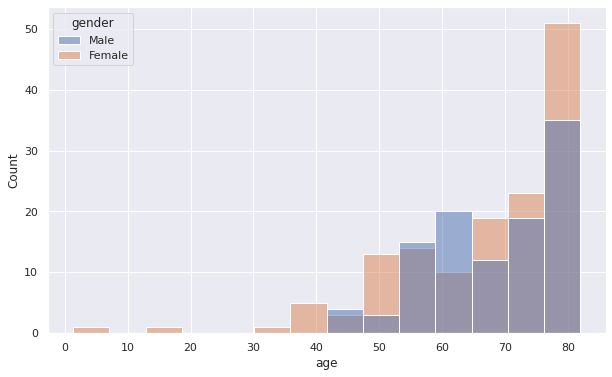

In [15]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(data=data1,x="age",hue="gender")

In [16]:

r1=data1.groupby('gender').count()['id']
r1

gender
Female    141
Male      108
Name: id, dtype: int64

In [17]:
# Stroke Patient's Age Distribution on Gender Basis
#Extracting Data on basis of Gender
m_data=data1[data1["gender"]=='Male']
f_data=data1[data1["gender"]=='Female'] #Extracting Data on basis of Gender

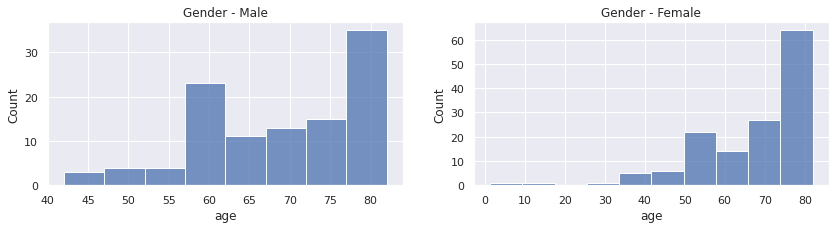

In [18]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=m_data,x="age",ax=ax1,)
sns.histplot(data=f_data,x="age",ax=ax2)
ax2.title.set_text('Gender - Female')

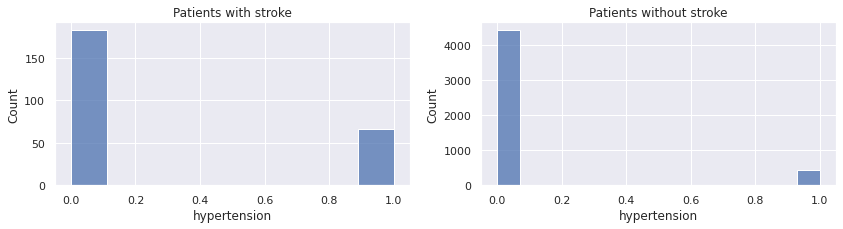

In [19]:
#Hypertension

s_data=df2[df2["stroke"]==1] #data of indiviudals with stroke
n_data=df2[df2["stroke"]==0] #data of indiviudals without stroke


sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="hypertension",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="hypertension",ax=ax2)
ax2.title.set_text('Patients without stroke')

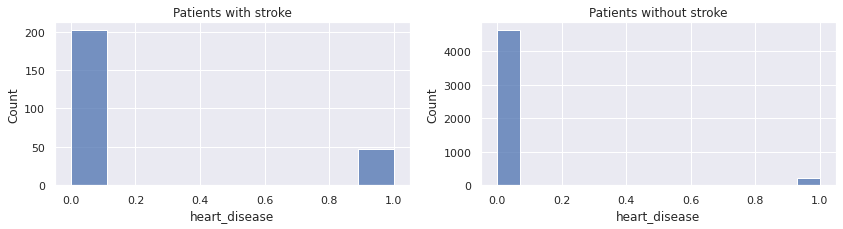

In [20]:
# Heart Disease
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="heart_disease",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="heart_disease",ax=ax2)
ax2.title.set_text('Patients without stroke')

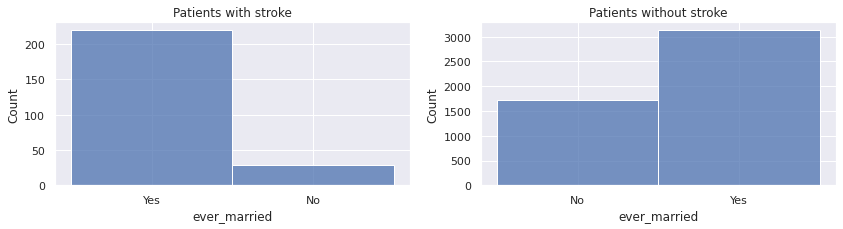

In [21]:
# Marital Status
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="ever_married",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="ever_married",ax=ax2)
ax2.title.set_text('Patients without stroke')

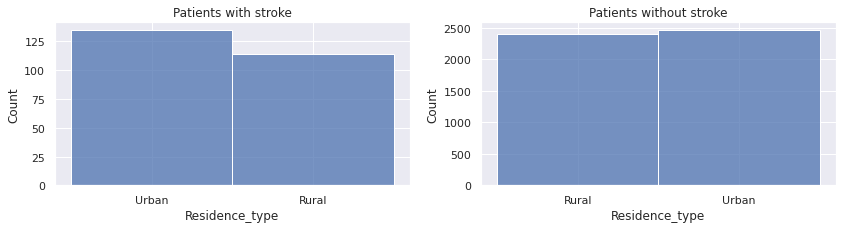

In [22]:
# Residence Type
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="Residence_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="Residence_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

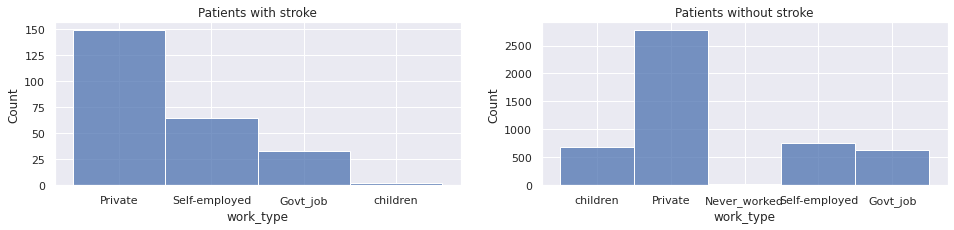

In [23]:
# Worktype
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="work_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="work_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

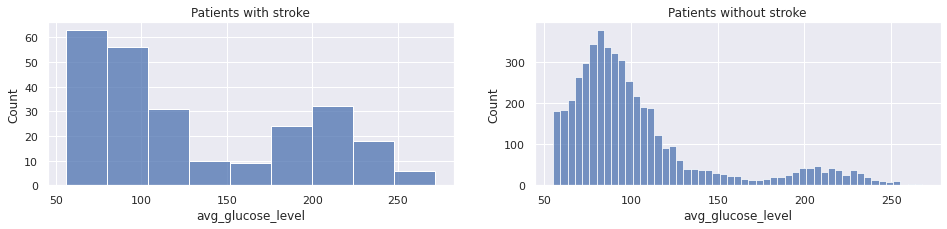

In [24]:
#Average glucose Level
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="avg_glucose_level",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="avg_glucose_level",ax=ax2)
ax2.title.set_text('Patients without stroke')

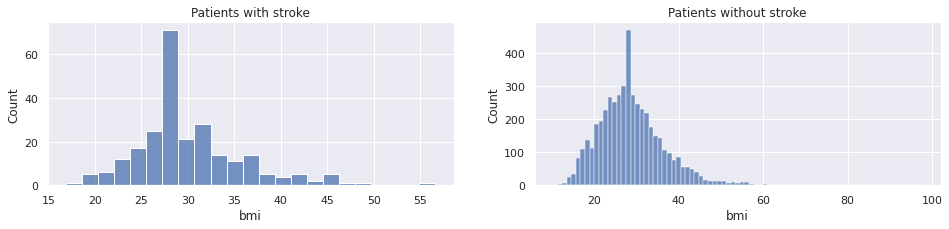

In [25]:
# Body Mass Index
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="bmi",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="bmi",ax=ax2)
ax2.title.set_text('Patients without stroke')

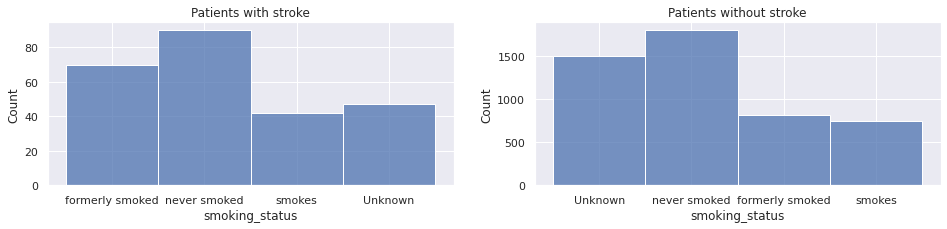

In [26]:
# Smoking Status
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="smoking_status",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="smoking_status",ax=ax2)
ax2.title.set_text('Patients without stroke')

#Observations
- Individuals with Brain Stroke : 4.26 % & 95.74% without Brain Stroke
- Number of Stroke Patients - Male : 108 (43.37%) & Female : 141 (56.62%)
- Most of the patients fall in between 60 years to 82 years.
- Also there are some young female stroke patients too
- Most of the Male patients fall in between 55 years to 82 years
- Most of the Female patients fall in between 48 years to 82 years
- Most of the stroke patients does not have hypertension
- It is found that hypertension is found in majority of individuals in our dataset ,which is also another major medical condition we should address
- Most of the stroke patients does not have heart disease
- According to our data most of our stroke patients are married
- According to our data most of our stroke patients living in the urban area
- 52.15% patients live in Urban area and 47.85% patients live in Rural area
- According to our data most of our stroke patients working in private & self-employed sectors
- We can see most of the patient's average glucose levels fall in between 60 to 120
- Also there are some high average glucose levels too
- Normal BMI range : 18.5 to 24.9
- We can see the Most of the Stroke patient's BMI fall in between 25 to 35.
- Also there are some high BMI values in patients without stroke
- Most of the stroke patients have Never Smoked
- Some of the stroke patients have Smoked Previously

In [27]:
# Drop id 
df2 = df2.drop(['id'], axis=1)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns
for c in df2.columns:  
    if(df2[c].dtype=='object'): # if column type = object
        df2[c] = encoder.fit_transform(df2[c])
    else: # else get the self column value without encode
        df2[c] = df2[c]

df2.head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# Splitting trainign and Testing Data set 


In [29]:
# Define X (Feature) and Y (Target)

X = df2.drop('stroke',axis='columns')

# Y consist data from 'stroke' column
y = df2['stroke']



In [30]:
# Split dataset to traning and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Normalization and Modelling

In [31]:

# Data normalization using scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [32]:
# Modelling
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier_KNN = KNeighborsClassifier()
classifier_DT = DecisionTreeClassifier()
classifier_RF = RandomForestClassifier()
classifier_GNB = GaussianNB()

# PCA

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_fit = pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print('Dimenion of the dataset after PCA:' + str(X_train.shape))
print(f"{sum(pca_fit.explained_variance_ratio_)*100:.2f}% of variance was explained by the PCA model with {2} components")


Dimenion of the dataset after PCA:(3577, 2)
38.68% of variance was explained by the PCA model with 2 components


In [34]:
pca_df = pd.DataFrame(data = X_train, columns = ['principal component 1', 'principal component 2'])
pca_df



,principal component 1,principal component 2
0,0.796683,-0.326381
1,2.208305,-0.915102
2,-3.466312,0.043901
3,0.546168,-0.764351
4,1.592417,-1.607968
...,...,...
3572,2.872590,-0.757427
3573,0.266477,-0.779857
3574,0.652800,-0.287865
3575,-1.225624,0.449950


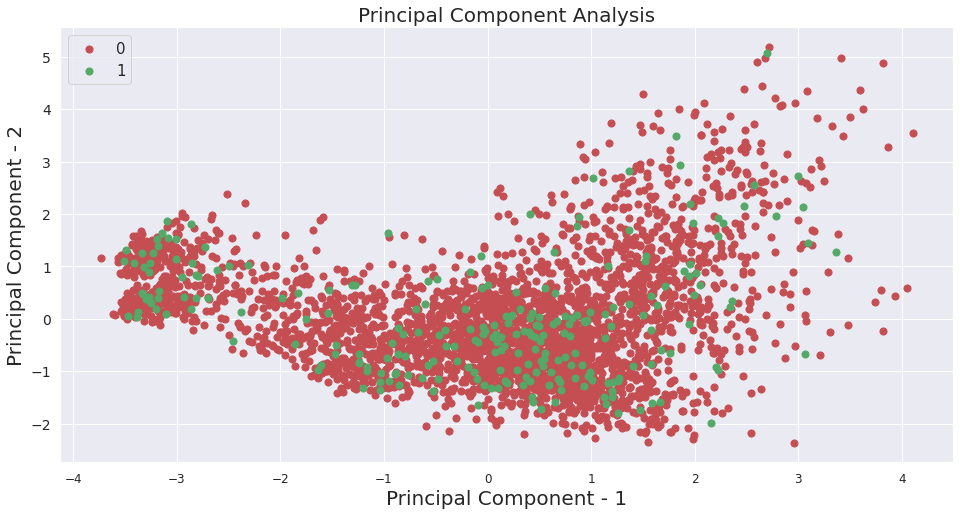

In [35]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['stroke'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

#KNN

In [36]:
classifier_KNN.fit(X_train, y_train)
hasilKNN = classifier_KNN.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":hasilKNN, "y_Actual":y_test})
dataEvaluation

,y_Prediksi,y_Actual
42,0,1
380,0,0
3524,0,0
352,0,0
4927,0,0
...,...,...
929,0,0
2629,0,0
663,0,0
2303,0,0


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, hasilKNN))
print('accuracy score :',accuracy_score(hasilKNN,y_test))
print('Precision Score :',precision_score(hasilKNN, y_test, average='weighted'))
print('recall score :',recall_score(hasilKNN,y_test, average='weighted'))
print('f1_score :',f1_score(hasilKNN, y_test, average='weighted'))
print('\n')
print(classification_report(y_test, hasilKNN))

[[1452    5]
 [  74    2]]
accuracy score : 0.9484670580560991
Precision Score : 0.9921379142895835
recall score : 0.9484670580560991
f1_score : 0.9692913710970148


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.29      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.62      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



#Decision Tree

In [38]:
classifier_DT.fit(X_train, y_train)
hasilDT = classifier_DT.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":hasilDT, "y_Actual":y_test})
dataEvaluation

,y_Prediksi,y_Actual
42,0,1
380,0,0
3524,1,0
352,0,0
4927,0,0
...,...,...
929,0,0
2629,0,0
663,0,0
2303,0,0


In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, hasilDT))
print('accuracy score :',accuracy_score(hasilDT,y_test))
print('Precision Score :',precision_score(hasilDT, y_test, average='weighted'))
print('recall score :',recall_score(hasilDT,y_test, average='weighted'))
print('f1_score :',f1_score(hasilDT, y_test, average='weighted'))
print('\n')
print(classification_report(y_test, hasilDT))

[[1403   54]
 [  60   16]]
accuracy score : 0.9256360078277887
Precision Score : 0.928580865859518
recall score : 0.9256360078277887
f1_score : 0.9270876337023831


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1457
           1       0.23      0.21      0.22        76

    accuracy                           0.93      1533
   macro avg       0.59      0.59      0.59      1533
weighted avg       0.92      0.93      0.92      1533



 # Random Forest

In [40]:
classifier_RF.fit(X_train, y_train)
hasilRF = classifier_RF.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":hasilRF, "y_Actual":y_test})
dataEvaluation

,y_Prediksi,y_Actual
42,0,1
380,0,0
3524,0,0
352,0,0
4927,0,0
...,...,...
929,0,0
2629,0,0
663,0,0
2303,0,0


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, hasilRF))
print('accuracy score :',accuracy_score(hasilRF,y_test))
print('Precision Score :',precision_score(hasilRF, y_test, average='weighted'))
print('recall score :',recall_score(hasilRF,y_test, average='weighted'))
print('f1_score :',f1_score(hasilRF, y_test, average='weighted'))
print('\n')
print(classification_report(y_test, hasilRF))

[[1453    4]
 [  72    4]]
accuracy score : 0.9504240052185258
Precision Score : 0.9923250930609683
recall score : 0.9504240052185258
f1_score : 0.9699252265058058


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.50      0.05      0.10        76

    accuracy                           0.95      1533
   macro avg       0.73      0.52      0.53      1533
weighted avg       0.93      0.95      0.93      1533



#GaussianNB

In [42]:
classifier_GNB.fit(X_train, y_train)
hasilGNB = classifier_GNB.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":hasilGNB, "y_Actual":y_test})
dataEvaluation

,y_Prediksi,y_Actual
42,0,1
380,0,0
3524,0,0
352,0,0
4927,0,0
...,...,...
929,1,0
2629,0,0
663,0,0
2303,0,0


In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, hasilGNB))
print('accuracy score :',accuracy_score(hasilGNB,y_test))
print('Precision Score :',precision_score(hasilGNB, y_test, average='weighted'))
print('recall score :',recall_score(hasilGNB,y_test, average='weighted'))
print('f1_score :',f1_score(hasilGNB, y_test, average='weighted'))
print('\n')
print(classification_report(y_test, hasilGNB))

[[1425   32]
 [  70    6]]
accuracy score : 0.9334637964774951
Precision Score : 0.9557504294672994
recall score : 0.9334637964774951
f1_score : 0.944124915808845


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1457
           1       0.16      0.08      0.11        76

    accuracy                           0.93      1533
   macro avg       0.56      0.53      0.54      1533
weighted avg       0.91      0.93      0.92      1533



# Results 

In [44]:
  # p - what p was actually correct 
  # r - what actaul p was correctly indentified 
  

In [45]:
table = [['Entity' ,'KNN', 'Desicion Tree', 'Random Forest' ,'Naive Bayes' ], 
         ['Accuracy', 0.955,0.921 ,0.962 ,0.945], 
         ['Recall', 0.99,0.96,1.00, 0.98 ]]


table1 = [['Entity' ,'KNN', 'Desicion Tree', 'Random Forest' ,'Naive Bayes' ], 
         ['Accuracy', 0.947,0.923 ,0.948 ,0.933], 
         ['Recall', 1,0.96,1.00, 0.98 ]]

In [46]:

from tabulate import tabulate
print(tabulate(table1, headers='firstrow', tablefmt='grid'))

+----------+-------+-----------------+-----------------+---------------+
| Entity   |   KNN |   Desicion Tree |   Random Forest |   Naive Bayes |
+==========+=======+=================+=================+===============+
| Accuracy | 0.947 |           0.923 |           0.948 |         0.933 |
+----------+-------+-----------------+-----------------+---------------+
| Recall   | 1     |           0.96  |           1     |         0.98  |
+----------+-------+-----------------+-----------------+---------------+
